**Import the relevant libraries**
* numpy for linear algebra and math 
* pandas for interacting with data and manipulation
* seaborn for visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

***Reading the csv files for train and test data***

In [2]:
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**We look at the details of the values and examine if there is any missing values**

In [3]:
#the info method displays the data type and null not null and how many entries there
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


***As we can see the total number of records is 891 and the followsing attributes showing missing values:***    
    *     Age            714
    *     Cabine         204
    *     Embarked       889
*Now we have to find out how to handle the missing values, some of the methods are:*
    *     Eleminating missing values
    *     Replace missing values with the mean value

In [4]:
#This can tell us how many missing values are there in the dataset
titanic.isnull().sum()
#Cabin seems to have the most of the missing values 
#Age has 177, we should know that replacing missing ages by the mean or median will result in
#a less accurate estimations

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**We drop the irrelevant attributes for our task here**
* Passinger id
* Passinger Name
* Ticket
* Cabin 

In [5]:
df = titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis =1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


*If we look close into the missing values for the embarked we can see the possibility to estimate the missing values. Because there are only 2 missing values and there are no other missing values for the two records.*

In [6]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


**Observations:**
* Same passingers are of class "1"
* Fare for both is "80"
*Lets look at the boxplot below to guess where they embarked from*

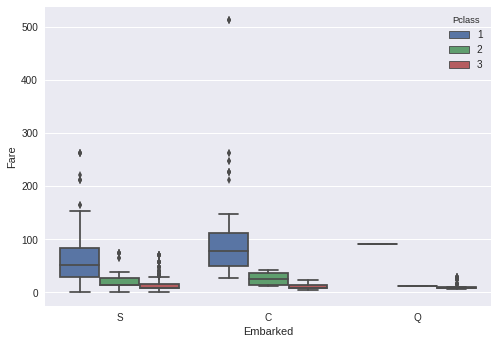

In [7]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df)

**We can observe the following:**
* First class tickets are mostly at embarked "S" and "C" (the blue box)
* First class median line is crossing at Fare value "80" at Embarked "C" 

In [8]:
# we replace the missing values in the embarked to "C"
df["Embarked"] = df["Embarked"].fillna('C')
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


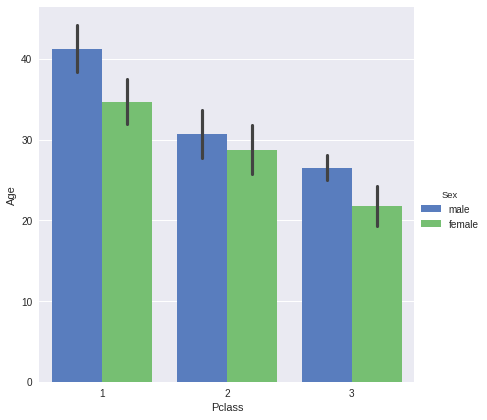

In [9]:
sns.factorplot(x="Pclass", y="Age", hue="Sex", data=df, size=6, kind="bar", palette="muted")

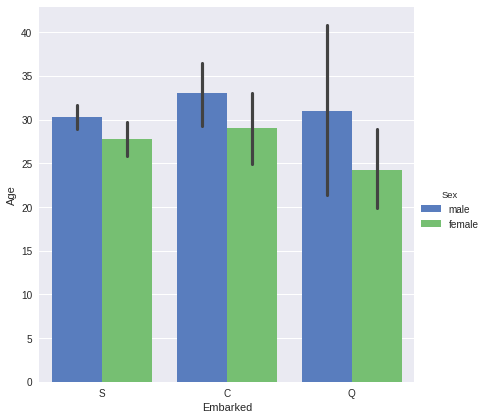

In [10]:
sns.factorplot(x="Embarked", y="Age", hue="Sex", data=df, size=6, kind="bar", palette="muted")

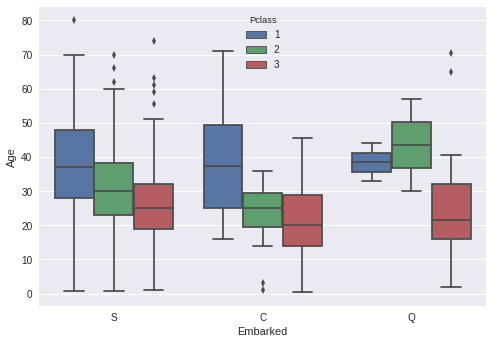

In [11]:
sns.boxplot(x="Embarked", y="Age", hue="Pclass", data=df)

**There are several ways to estimate ages here, but what we can do is considering 
the median in each Embarked value. This would would mean we have to group Passingers
by class then by embarked then take the Median age for each class in each embarked
and fill the missing values with those medians.
**

**Embarked S**

In [12]:
#Getting Embarked S data into separte frame and work to calculate Median for each class
s = df.loc[df["Embarked"] == "S"]
v = [1, 2, 3]
for i in v:
    ss = s.where(s["Pclass"] == i)
    print ("Median age of class ",i, " = ",ss["Age"].median())

Median age of class  1  =  37.0
Median age of class  2  =  30.0
Median age of class  3  =  25.0


**Embarked C**

In [13]:
#Getting Embarked C data into separte frame and work to calculate Median for each class
c = df.loc[df["Embarked"] == "C"]
v = [1, 2, 3]
for i in v:
    sc = c.where(c["Pclass"] == i)
    print ("Median age of class ",i, " = ",sc["Age"].median())

Median age of class  1  =  37.5
Median age of class  2  =  25.0
Median age of class  3  =  20.0


**Embarked Q**

In [14]:
#Getting Embarked Q data into separte frame and work to calculate Median for each class
q = df.loc[df["Embarked"] == "Q"]
v = [1, 2, 3]
for i in v:
    sq = q.where(q["Pclass"] == i)
    print ("Median age of class ",i, " = ",sq["Age"].median())

Median age of class  1  =  38.5
Median age of class  2  =  43.5
Median age of class  3  =  21.5


*Now that we know the median age in each class and Embark,
our estimation can get much better for the missing ages.*

**Fill missing values for each sub-dataframe then combine all the sub dataframes into one**

In [15]:
#Embark S
s1 = df[(df["Pclass"] == 1) & (df['Embarked'] == "S") & (df['Age'].isnull())].fillna(37)
s2 = df[(df["Pclass"] == 2) & (df['Embarked'] == "S") & (df['Age'].isnull())].fillna(30)
s3 = df[(df["Pclass"] == 3) & (df['Embarked'] == "S") & (df['Age'].isnull())].fillna(25)

#Embark C
c1 = df[(df["Pclass"] == 1) & (df['Embarked'] == "C") & (df['Age'].isnull())].fillna(37.5)
c2 = df[(df["Pclass"] == 2) & (df['Embarked'] == "C") & (df['Age'].isnull())].fillna(25)
c3 = df[(df["Pclass"] == 3) & (df['Embarked'] == "C") & (df['Age'].isnull())].fillna(20)

#Embark Q
q1 = df[(df["Pclass"] == 1) & (df['Embarked'] == "Q") & (df['Age'].isnull())].fillna(38.5)
q2 = df[(df["Pclass"] == 2) & (df['Embarked'] == "Q") & (df['Age'].isnull())].fillna(43.5)
q3 = df[(df["Pclass"] == 3) & (df['Embarked'] == "Q") & (df['Age'].isnull())].fillna(21.5)

In [16]:
#Concatinating all the sub-frames into one frame with replaced Age values
scq = pd.concat([s1,s2,s3,c1,c2,c3,q1,q2,q3])
len(scq) #177 rows which equals to the missing values in the age column

177

In [17]:
#We drop records of missing vlaues
df = df.dropna(axis = 0, how = 'any')
#we will be left with only records with non-null values

In [18]:
#Now we concatinate the scq (replaced values frame) with main frame
data = pd.concat([df, scq])

#Checking the info to make sure we have same number of records as the original one we started with
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 828
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


**Great !!**

**Now we have complete set of data with no missing values, but if we looked closer into the data types we will see that
some of the columns have an object data type. Object is a type that is non-numeric and we refer to them as categorical data. In order to pass our data into a Machine Learning model, we have to ensure that our data includes only numeric values.**

***So, the next step is to convert our categorical data into numeric values.***

In [19]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

data['Sex'] = number.fit_transform(data['Sex'].astype('str'))
data['Embarked'] = number.fit_transform(data['Embarked'].astype('str'))

**The label encoder function we used is simply going to replace values like Male/Female into 0/1 or embark S/C/Q into 0/1/2. This way our data is still the same just expressed numerically.**

In [20]:
#Check our Dataframe
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**So far our training data is in form that we can pass in to a Machine Learning model, but our testing data is still in a raw form. Lets check our testing data here. Note that our testing data will have the same columns except for the labels. We are expected to generate labels from our trained model.**

In [21]:
titanictest = pd.read_csv("../input/test.csv")
titanictest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
titanictest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**We model our testing data the following the same way we did with the training data. The following steps:**    
1. Remove [ PassengerId, Name, Cabin, Ticket]
2. Fill missing values in [Age, Fare]
3. Convert categorical values into numeric values [Sex, Embarked]

In [23]:
#Drop Columns
Ttest = titanictest.drop(['Name', 'Ticket', 'Cabin'], axis =1)
Ttest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


**Fill Missing values in testing data**

In [24]:
#Fill Missing values
Ttest[Ttest['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [25]:
#calculate median fare
m = Ttest["Fare"].median()

#Since its the only one, we can just replace it with the mean Fare
Ttest["Fare"] = Ttest["Fare"].fillna(m)



**Age column has got a lot of missing values, we use same way to estimate median age based on Passinger class and Embarked. Same like we did before.**

In [26]:
#Embarked S
s = Ttest.loc[Ttest["Embarked"] == "S"]
v = [1, 2, 3]
for i in v:
    ss = s.where(s["Pclass"] == i)
    print ("Median age of class ",i, " = ",ss["Age"].median())

Median age of class  1  =  42.0
Median age of class  2  =  26.0
Median age of class  3  =  24.0


In [27]:
#Getting Embarked C data into separte frame and work to calculate Median for each class
c = Ttest.loc[Ttest["Embarked"] == "C"]
v = [1, 2, 3]
for i in v:
    sc = c.where(c["Pclass"] == i)
    print ("Median age of class ",i, " = ",sc["Age"].median())

Median age of class  1  =  43.0
Median age of class  2  =  27.0
Median age of class  3  =  21.0


In [28]:
#Getting Embarked Q data into separte frame and work to calculate Median for each class
q = Ttest.loc[Ttest["Embarked"] == "Q"]
v = [1, 2, 3]
for i in v:
    sq = q.where(q["Pclass"] == i)
    print ("Median age of class ",i, " = ",sq["Age"].median())

Median age of class  1  =  37.0
Median age of class  2  =  61.0
Median age of class  3  =  24.0


*Now we know the median age of the passinger classes. We can fill the missing values in the same un-efficient way. Sorry I couldn't make it better though have tried every way I know.'*

In [29]:
#Embark S
s1 = Ttest[(Ttest["Pclass"] == 1) & (Ttest['Embarked'] == "S") & (Ttest['Age'].isnull())].fillna(42)
s2 = Ttest[(Ttest["Pclass"] == 2) & (Ttest['Embarked'] == "S") & (Ttest['Age'].isnull())].fillna(26)
s3 = Ttest[(Ttest["Pclass"] == 3) & (Ttest['Embarked'] == "S") & (Ttest['Age'].isnull())].fillna(24)

#Embark C
c1 = Ttest[(Ttest["Pclass"] == 1) & (Ttest['Embarked'] == "C") & (Ttest['Age'].isnull())].fillna(43)
c2 = Ttest[(Ttest["Pclass"] == 2) & (Ttest['Embarked'] == "C") & (Ttest['Age'].isnull())].fillna(27)
c3 = Ttest[(Ttest["Pclass"] == 3) & (Ttest['Embarked'] == "C") & (Ttest['Age'].isnull())].fillna(21)

#Embark Q
q1 = Ttest[(Ttest["Pclass"] == 1) & (Ttest['Embarked'] == "Q") & (Ttest['Age'].isnull())].fillna(37)
q2 = Ttest[(Ttest["Pclass"] == 2) & (Ttest['Embarked'] == "Q") & (Ttest['Age'].isnull())].fillna(61)
q3 = Ttest[(Ttest["Pclass"] == 3) & (Ttest['Embarked'] == "Q") & (Ttest['Age'].isnull())].fillna(24)

scq = pd.concat([s1,s2,s3,c1,c2,c3,q1,q2,q3])

Ttest = Ttest.dropna(axis = 0, how = 'any')

Testdata = pd.concat([Ttest, scq])
TestdataID = pd.DataFrame(Testdata['PassengerId'], columns = ['PassengerId'])

Testdata = Testdata.drop(['PassengerId'], axis =1)
Testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 410
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [30]:
#Converting our categorical data inot numeric
Testdata['Sex'] = number.fit_transform(Testdata['Sex'].astype('str'))
Testdata['Embarked'] = number.fit_transform(Testdata['Embarked'].astype('str'))

**Now that our both DataFrames are ready, one more thing left to do. Looking at our training data below we can see that our labels (Survived) are with the frame and it would be better to separate this column from the rest of the frame.**

In [31]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Y_data = data['Survived'].values
X_data = data[list(features)].values
X_test = Testdata[list(features)].values

**Training Our linear SVM**

In [32]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(X_data, Y_data) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [33]:
#we predict the survival of the testdata and save it
pseudoY_test = lin_clf.predict(Testdata)

**Now we have the following:**

1. training data
2. labels for training data.
3. trained linear svm.
4. predicted labels for test data.

**Implemtation of Pseudo-labelin semi-supervised learning method**

*What we should do now if to concatinate our training and testing data, training labels and predicted labels.*
*Then retrain the model in the new data and analyze the performance.*

In [34]:

X = np.vstack((X_data, X_test))
Y = np.concatenate((Y_data, pseudoY_test), axis=0)

pseudo_model = svm.LinearSVC()
pseudo_model.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

**Now we can compare the performance of the main model *lin_clf *and the *pseudo_model* as follows:**

In [35]:
Accuracyclf = lin_clf.score(X_data, Y_data)
print ("Accuracy of the lin_clf model: ", Accuracyclf*100, "%")

Accuracypseudo = lin_clf.score(X, Y)
print ("Accuracy of the lin_clf model: ", Accuracypseudo*100, "%")

Accuracy of the lin_clf model:  79.4612794613 %
Accuracy of the lin_clf model:  86.0198624905 %


**The experiment above shows that our model trained with the Pseudo-labelin semi-supervised learning method perfmored better than our linear model.  If we tried to test the performance of our method across several classifiers as below :**

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearSVC()]

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X, Y)
    accurracy = clf.score(X, Y)
    print(accurracy, name)

0.809014514897 KNeighborsClassifier
0.914438502674 SVC
0.98090145149 DecisionTreeClassifier
0.970206264324 RandomForestClassifier
0.877005347594 AdaBoostClassifier
0.900687547746 GradientBoostingClassifier
0.838808250573 GaussianNB
0.853323147441 LogisticRegression
0.808250572956 LinearSVC


**The top 2 are:**

*** 97.32% DecisionTreeClassifier**

*** 95.95% RandomForestClassifier**

**Note: Kaggle grader gives very weak performance for Decision Tree and Random Forest. However, I have tried with AdaBoost classifier and it performs better. The code below will take you through training and testing the AdaBoost classifier with 500 estimators.**

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=500)
scores = cross_val_score(clf, X, Y)
scores.mean()
clf.fit(X, Y)

Accuracy = clf.score(X, Y)
print ("Accuracy in the training data: ", Accuracy*100, "%")

prediction = clf.predict(X_test)
dfPrediction = pd.DataFrame(data=prediction,columns=['Survived'])
dfsubmit = pd.concat([TestdataID['PassengerId'], dfPrediction['Survived']], axis = 1, join_axes=[TestdataID['PassengerId'].index])
dfsubmit = dfsubmit.reset_index(drop=True)
TestPredict = dfsubmit.to_csv('TestPredictADABOOST.csv')

Accuracy in the training data:  88.922841864 %
